In [144]:
#import pandas as pd
#df = pd.read_csv(r'C:\Users\grazg\OneDrive\Desktop\DV_lottery_dataset.csv')

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

filename = (r'C:\Users\grazg\OneDrive\Desktop\DV_lottery_dataset.csv')
df = pd.read_csv(filename, sep=";", encoding="latin1")
df.dropna(0, inplace = True)

print(df.info())




<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 213
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Foreign State     185 non-null    object 
 1   Region            185 non-null    object 
 2   2008_visas        185 non-null    float64
 3   2009_visas        185 non-null    float64
 4   2010_visas        185 non-null    float64
 5   2011_visas        185 non-null    float64
 6   2012_visas        185 non-null    float64
 7   2013_visas        185 non-null    float64
 8   2014_visas        185 non-null    float64
 9   2015_visas        185 non-null    float64
 10  2016_visas        185 non-null    float64
 11  2017_visas        185 non-null    float64
 12  2007_Entrants     185 non-null    float64
 13  2007_Derivatives  185 non-null    float64
 14  2007_Total        185 non-null    float64
 15  2008_Entrants     185 non-null    float64
 16  2008_Derivatives  185 non-null    float64
 1

C:\Users\grazg\AppData\Local\Temp/ipykernel_16536/2605536899.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df.dropna(0, inplace = True)


In [146]:
df.head(5)

,Foreign State,Region,2008_visas,2009_visas,2010_visas,2011_visas,2012_visas,2013_visas,2014_visas,2015_visas,...,2015_Total,2016_Entrants,2016_Derivatives,2016_Total,2017_Entrants,2017_Derivatives,2017_Total,2018_Entrants,2018_Derivatives,2018_Total
0,Afghanistan,Asia,32.0,46.0,66.0,25.0,43.0,59.0,95.0,28.0,...,27789.0,32950.0,33001.0,65951.0,39672.0,43605.0,83277.0,58576.0,64179.0,122755.0
1,Albania,Europe,2057.0,2033.0,1645.0,965.0,528.0,994.0,1571.0,1910.0,...,198625.0,127277.0,118852.0,246129.0,162521.0,153321.0,315842.0,189168.0,178063.0,367231.0
2,Algeria,Africa,823.0,798.0,797.0,846.0,343.0,1058.0,971.0,1093.0,...,163091.0,147732.0,56701.0,204433.0,176403.0,76330.0,252733.0,229410.0,113447.0,342857.0
3,Andorra,Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,134.0,105.0,81.0,186.0,121.0,45.0,166.0,123.0,52.0,175.0
4,Angola,Africa,4.0,14.0,6.0,15.0,7.0,13.0,10.0,8.0,...,9198.0,4573.0,6973.0,11546.0,6175.0,8684.0,14859.0,9410.0,13409.0,22819.0


        index        0
0  2008_visas  46633.0
1  2009_visas  48036.0
2  2010_visas  51312.0
3  2011_visas  51118.0
4  2012_visas  34463.0
5  2013_visas  52571.0
6  2014_visas  52342.0
7  2015_visas  49377.0
8  2016_visas  46718.0
9  2017_visas  49976.0


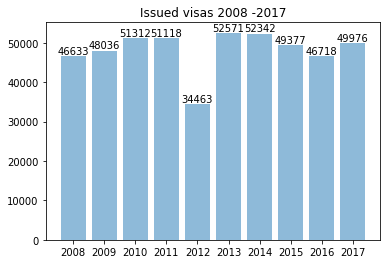

In [156]:
#Bar chart which shows issued visas from 2008 to 2017 

totals = df[df.columns[2:12]].sum().reset_index()
print(totals)

x = totals.iloc[:, 0]
y = totals.iloc[:, 1]
y_pos = np.arange(len(x))
p1 = plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
positions = (0 ,1, 2, 3, 4, 5, 6, 7, 8, 9)
labels = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017')
plt.xticks(positions, labels)
plt.title('Issued visas 2008 -2017')
plt.bar_label(p1)
plt.show()
# for i, v in enumerate(y):
#     ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

C:\Users\grazg\AppData\Local\Temp/ipykernel_16536/1443044504.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totalparticipants= df.groupby('Region')['2007_Total','2008_Total','2009_Total', '2010_Total', '2011_Total',


[404840.0, 418300.0, 441260.0, 434490.0, 310190.0, 466200.0, 471850.0, 467900.0, 447950.0, 476970.0]
[6584376.0, 6747798.0, 7202155.0, 7669075.0, 8885945.0, 10178707.0, 11854993.0, 14011763.0, 17144828.0, 18868875.0]


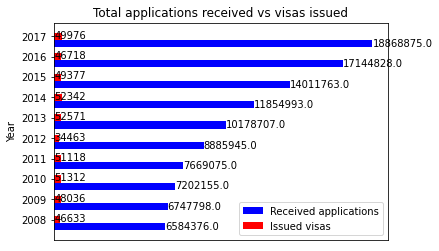

In [148]:
#Total participants vs visas issued by year

totalparticipants= df.groupby('Region')['2007_Total','2008_Total','2009_Total', '2010_Total', '2011_Total',
                '2012_Total', '2013_Total', '2014_Total', '2015_Total',
                '2016_Total', '2017_Total', '2018_Total'].sum()



#Total visas sum:
totals = df[df.columns[2:12]].sum().reset_index()

#Grouped bar chart by visas and participant count :

totalvisasissued = np.array(totals.iloc[:, 1]*10)# visas issued is multiplied by 10 to get a larger bar in barchart to be visible against total participants as it's quite big
totalv = totalvisasissued.tolist()
print(totalv)


totalentries = [df['2008_Total'].sum(), df['2009_Total'].sum(),df['2010_Total'].sum(),
                df['2011_Total'].sum(),df['2012_Total'].sum(),df['2013_Total'].sum(),df['2014_Total'].sum(),
                df['2015_Total'].sum(),df['2016_Total'].sum(), df['2017_Total'].sum()]

print(totalentries)


n_groups = 10
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1.0

rects1 = plt.barh(index, totalentries, bar_width, alpha=opacity, color='b', label='Received applications')

rects2 = plt.barh(index + bar_width, totalv, bar_width, alpha=opacity, color='red', label='Issued visas')

plt.ylabel('Year')
# plt.ylabel('Entries')
plt.title('Total applications received vs visas issued')
plt.yticks(index + bar_width, ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
plt.xticks([])
plt.legend()
#putting labes on bars
y1 = (46633, 48036, 51312, 51118, 34463, 52571, 52342, 49377, 46718, 49976)
y= (6584376.0, 6747798.0, 7202155.0, 7669075.0, 8885945.0, 10178707.0, 11854993.0, 14011763.0, 17144828.0, 18868875.0)
for i, v in enumerate(y):
    ax.text(v, i, str(v), color='black', va='center')

for i, v in enumerate(y1):
    ax.text(v, i+0.4 , str(v), color='black', va='center',ha = 'left')

plt.show()

C:\Users\grazg\AppData\Local\Temp/ipykernel_16536/2878763612.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totalparticipants= df.groupby('Region')['2007_Total','2008_Total','2009_Total', '2010_Total', '2011_Total',


Region
Africa                                               78456406.0
Asia                                                 51290762.0
Europe                                               44559792.0
South America, Central America, and the Caribbean     4052338.0
Oceania                                                495325.0
North America                                           39925.0
Name: Total, dtype: float64


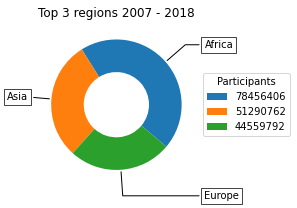

In [154]:
#top 3 continents in participation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from IPython.display import HTML

df = pd.read_csv(filename, sep=";", encoding="latin1")

#total participants by region
totalparticipants= df.groupby('Region')['2007_Total','2008_Total','2009_Total', '2010_Total', '2011_Total',
                '2012_Total', '2013_Total', '2014_Total', '2015_Total',
                '2016_Total', '2017_Total', '2018_Total'].sum()


#total participans--top 3, will be used for graphs
totalparticipants['Total']= totalparticipants.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].sum(axis=1)
top3 = totalparticipants.nlargest(10, ['Total'])
print(top3.iloc[:,-1])
#Donut pie char by 3 top regions:

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
fig.patch.set_facecolor('white')
Regionas = ['Africa','Asia','Europe']
data = [78456406, 51290762, 44559792]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(Regionas[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Top 3 regions 2007 - 2018")
ax.patch.set_facecolor('white')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

ax.legend(wedges, data,
          title="Participants",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()




In [150]:
#Top 10 countries to participate 

totalparticipantsc= df.groupby('Foreign State')['2007_Total','2008_Total','2009_Total', '2010_Total', '2011_Total',
                '2012_Total', '2013_Total', '2014_Total', '2015_Total',
                '2016_Total', '2017_Total', '2018_Total'].sum()
totalparticipantsc['Total']= totalparticipantsc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].sum(axis=1)
top10 = totalparticipantsc.nlargest(10, ['Total'])
print(top10.iloc[:,-1])
print(totalparticipantsc.nlargest(10, 'Total').T)
print(top10)

# totalentrants= df.groupby('Foreign State')['2007_Entrants','2008_Entrants','2009_Entrants', '2010_Entrants', '2011_Entrants',
#                 '2012_Entrants', '2013_Entrants', '2014_Entrants', '2015_Entrants',
#                 '2016_Entrants', '2017_Entrants', '2018_Entrants'].sum()

# totalentrants['Total']= totalentrants.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].sum(axis=1)
# print(totalentrants.nlargest(10, 'Total').T)


Foreign State
Bangladesh      24614711.0
Ukraine         13650654.0
Nigeria         13569048.0
Ghana           13543810.0
Uzbekistan       9859403.0
Egypt            9410854.0
Ethiopia         9218349.0
Iran             9131769.0
Nepal            7509078.0
Sierra Leone     4901670.0
Name: Total, dtype: float64
Foreign State  Bangladesh     Ukraine     Nigeria       Ghana  Uzbekistan  \
2007_Total      1436946.0    681067.0   1075535.0    290697.0    119711.0   
2008_Total      2164588.0    890979.0   1177893.0    301371.0    153661.0   
2009_Total      5118676.0    974032.0   1228473.0    381618.0    173796.0   
2010_Total       834324.0    927470.0   1570316.0    523448.0    194033.0   
2011_Total      6497926.0   1080091.0   2144626.0    609924.0    295828.0   
2012_Total      8562251.0   1122086.0   2005876.0    774557.0    507361.0   
2013_Total            0.0   1232306.0   1975571.0   1056032.0    654327.0   
2014_Total            0.0   1255129.0   2390758.0   1217888.0   1193657.

C:\Users\grazg\AppData\Local\Temp/ipykernel_16536/508373396.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totalparticipantsc= df.groupby('Foreign State')['2007_Total','2008_Total','2009_Total', '2010_Total', '2011_Total',


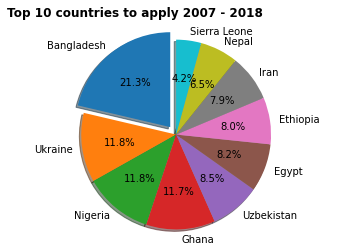

In [151]:
# Top 10 countries where the most people participated in the lottery-- pie chart

labels = 'Bangladesh', 'Ukraine', 'Nigeria', 'Ghana', 'Uzbekistan', 'Egypt', 'Ethiopia', 'Iran','Nepal', 'Sierra Leone'
sizes = [24614711, 13650654, 13569048, 13543810,9859403,9410854, 9218349, 9131769, 7509078, 4901670]
explode = (0.1, 0, 0, 0, 0,0,0,0,0,0)

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('white')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Top 10 countries to apply 2007 - 2018", size=12, weight="bold", loc="left")

plt.show()

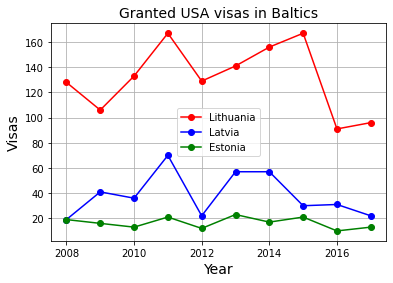

In [159]:
#How many visas Baltic countries received over the years

Lithuanian_visas = df[df['Foreign State'] == 'Lithuania']
Lithuanian_visas[['Foreign State',  'Region',  '2008_visas',  '2009_visas',  '2010_visas',  '2011_visas','2012_visas','2013_visas','2014_visas','2015_visas','2016_visas','2017_visas']]

Latvian_visas =df[df['Foreign State'] == 'Latvia']
Latvian_visas[['Foreign State',  'Region',  '2008_visas',  '2009_visas',  '2010_visas',  '2011_visas','2012_visas','2013_visas','2014_visas','2015_visas','2016_visas','2017_visas']]

Estonian_visas = df[df['Foreign State'] == 'Estonia']
Estonian_visas[['Foreign State',  'Region',  '2008_visas',  '2009_visas',  '2010_visas',  '2011_visas','2012_visas','2013_visas','2014_visas','2015_visas','2016_visas','2017_visas']]

Data = {'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
        'Lithuania': [128.0,	106.0,	133.0,	167.0,	129.0,	141.0,	156.0,	167.0,	91.0,	96.0],
        'Latvia': [19,41,36,70,22,57,57,30,31,22],
        'Estonia': [19,16,13,21,12,23,17,21,10,13]
       }
  
df1 = pd.DataFrame(Data,columns=['Year','Visas','Lithuania','Latvia','Estonia'])
  
plt.plot(df1['Year'], df1['Lithuania'], label ='Lithuania', color='red', marker='o')
plt.plot(df1['Year'], df1['Latvia'], label ='Latvia', color='blue', marker='o')
plt.plot(df1['Year'], df1['Estonia'], label ='Estonia', color='green', marker='o')
plt.title('Granted USA visas in Baltics', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Visas', fontsize=14)
plt.grid(True)
plt.legend()

# for i, v in enumerate('Lithuania'):
#     ax.text(v, i, str(v), color='black', va='center')

plt.show()

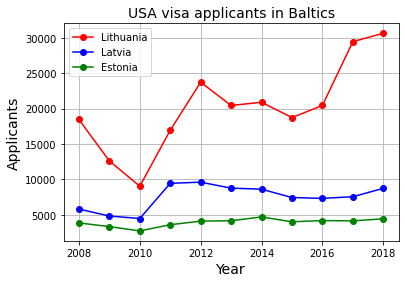

In [153]:
#How many entrants were in Baltic countries over the years

Lithuanian_visas = df[df['Foreign State'] == 'Lithuania']
Lithuanian_visas[['Foreign State',  'Region', '2008_Total','2009_Total', '2010_Total', '2011_Total','2012_Total', '2013_Total', '2014_Total', '2015_Total','2016_Total', '2017_Total', '2018_Total']]

Latvian_visas =df[df['Foreign State'] == 'Latvia']
Latvian_visas[['Foreign State',  'Region',  '2008_Total','2009_Total', '2010_Total', '2011_Total','2012_Total', '2013_Total', '2014_Total', '2015_Total','2016_Total', '2017_Total', '2018_Total']]

Estonian_visas = df[df['Foreign State'] == 'Estonia']
Estonian_visas[['Foreign State',  'Region',  '2008_Total','2009_Total', '2010_Total', '2011_Total','2012_Total', '2013_Total', '2014_Total', '2015_Total','2016_Total', '2017_Total', '2018_Total']]

Data = {'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,2018],
        'Lithuania': [18468.0,12603.0,9030.0,16937.0,23739.0,20449.0,20900.0,18735.0,20454.0,29475.0,30666.0],
        'Latvia': [5794.0,	4809.0,	4457.0,	9434.0,	9596.0,	8755.0,	8603.0,	7424.0,	7304.0,	7540.0,	8723.0],
        'Estonia': [3836.0,	3309.0,	2701.0,	3577.0,	4088.0,	4140.0,	4680.0,	3991.0,	4167.0,	4118.0,	4417.0]
       }
  
df1 = pd.DataFrame(Data,columns=['Year','Visas','Lithuania','Latvia','Estonia'])
  
plt.plot(df1['Year'], df1['Lithuania'], label ='Lithuania', color='red', marker='o')
plt.plot(df1['Year'], df1['Latvia'], label ='Latvia', color='blue', marker='o')
plt.plot(df1['Year'], df1['Estonia'], label ='Estonia', color='green', marker='o')
plt.title('USA visa applicants in Baltics', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Applicants', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()